<a href="https://colab.research.google.com/github/Mamoro98/CIFAR-10-Using-Computer-Vision/blob/main/omer_Stat_Assignment_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>LBW dataset</h1>

# 1. Setup and Data Import

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
import statsmodels.formula.api as smf

LBW = pd.read_csv("LBW.csv")

LBW['sex'] = LBW['sex'].map({1: 'Female', 0: 'Male'})

print(LBW.head())


   iqfull  iqverb  iqperf  rcomp  rrate  racc  tomifull    bw   rbw  ga   sex  \
0      90      87      95     87     90    86       4.0  1.12  0.99  27  Male   
1     104      96     114     94    114   105       3.5  1.25  1.11  27  Male   
2      82      85      82     90     87    91       1.5  1.27  1.04  28  Male   
3      91      91      92     90     88    90       5.5  1.25  1.02  28  Male   
4      87      87      88     85     96    95       8.5  0.97  0.79  28  Male   

   educage  benef  
0     16.0    2.0  
1     16.0    1.0  
2     16.0    2.0  
3     16.0    2.0  
4     16.0    1.0  


# 2. Figure of “Reading Score” by Sex & 95% CI for Difference


### 2A. Boxplot of rcomp by Sex

<ipython-input-36-bf3eea2bb304>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='sex', y='rcomp', data=LBW, palette='pastel')
<ipython-input-36-bf3eea2bb304>:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


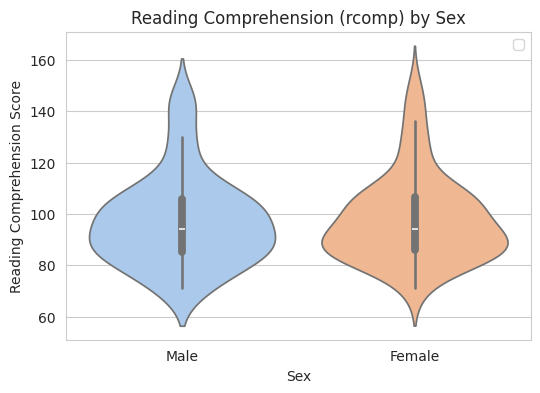

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6, 4))
sns.violinplot(x='sex', y='rcomp', data=LBW, palette='pastel')
plt.title("Reading Comprehension (rcomp) by Sex")
plt.xlabel("Sex")
plt.ylabel("Reading Comprehension Score")
plt.legend()
plt.savefig("rcomp by sex violin.svg")
plt.show()


### 2B. Two-Sample t-Test & 95% Confidence Interval


In [ ]:
female_data = LBW.loc[LBW['sex'] == 'Female', 'rcomp'].dropna()
male_data   = LBW.loc[LBW['sex'] == 'Male',   'rcomp'].dropna()


ttest_result = ttest_ind(female_data, male_data, equal_var=False)
print("t-statistic:", ttest_result.statistic)
print("p-value:", ttest_result.pvalue)


mean_diff = female_data.mean() - male_data.mean()
print("Mean difference (Female - Male):", mean_diff)





import math
from scipy.stats import t

n1 = len(female_data)
n2 = len(male_data)
var1 = female_data.var(ddof=1)
var2 = male_data.var(ddof=1)


se = math.sqrt(var1/n1 + var2/n2)



df_num = (var1/n1 + var2/n2)**2
df_den = ((var1/n1)**2/(n1-1)) + ((var2/n2)**2/(n2-1))
df_welch = df_num / df_den


alpha = 0.05
t_crit = t.ppf(1 - alpha/2, df_welch)

ci_lower = mean_diff - t_crit * se
ci_upper = mean_diff + t_crit * se

print(f"95% CI for difference in means: [{ci_lower:.3f}, {ci_upper:.3f}]")


t-statistic: 0.2518482735167686
p-value: 0.8014984491772374
Mean difference (Female - Male): 0.6988829528897611
95% CI for difference in means: [-4.784, 6.181]


The mean difference in scores between females and males is about -0.70, but the 95% confidence interval ranges from -6.18 to 4.78, which includes 0. In other words, we do not have sufficient evidence to conclude that there is a real difference between the groups’ mean scores. The p-value of 0.80 further supports that any observed difference is not statistically significant at conventional levels.

# 3. Graph of “Reading Score” vs. IQ, Labeled by benef


### 3A. Scatter Plot with a Single Fitted Regression Line


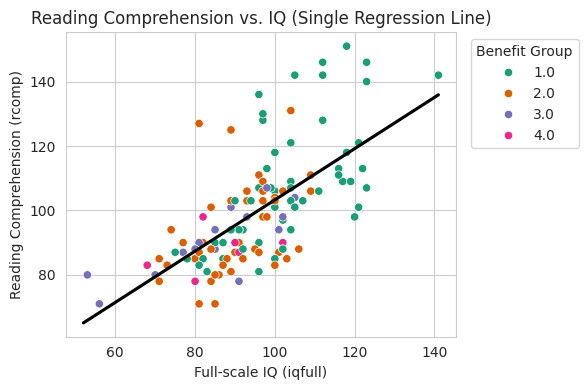

In [ ]:
plt.figure(figsize=(6, 4))
sns.scatterplot(x='iqfull', y='rcomp', hue='benef', data=LBW, palette='Dark2')
sns.regplot(x='iqfull', y='rcomp', data=LBW, scatter=False,
            line_kws={'color': 'black'}, ci=None)
plt.title("Reading Comprehension vs. IQ (Single Regression Line)")
plt.xlabel("Full-scale IQ (iqfull)")
plt.ylabel("Reading Comprehension (rcomp)")
plt.legend(title="Benefit Group", bbox_to_anchor=(1.02, 1), loc='upper left')
plt.tight_layout()
plt.savefig("rcomp vs iq.svg")
plt.show()


### 3B. Separate Regression Lines by benef


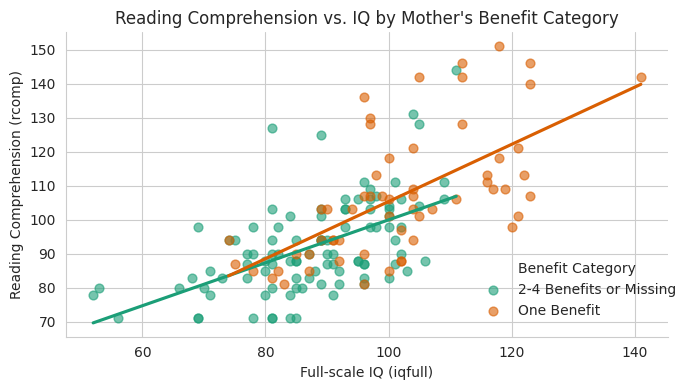

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


def categorize_benef(x):
    if x == 1:
        return "One Benefit"
    else:
        return "2-4 Benefits or Missing"


LBW['benef_group'] = LBW['benef'].apply(categorize_benef)


plot = sns.lmplot(x='iqfull', y='rcomp', hue='benef_group', data=LBW, ci=None,
                  palette='Dark2', height=4, aspect=1.2, scatter_kws={'alpha': 0.6, 's': 40})


legend = plot._legend
legend.set_title("Benefit Category")
legend.set_bbox_to_anchor((1, 0.25))
legend.get_frame().set_edgecolor("black")


plt.title("Reading Comprehension vs. IQ by Mother's Benefit Category")
plt.xlabel("Full-scale IQ (iqfull)")
plt.ylabel("Reading Comprehension (rcomp)")
plt.tight_layout()


plt.savefig("rcomp_vs_iq_by_benef.svg")
plt.show()


<ipython-input-24-8d3bcb7fbdfe>:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_by_cgeduc = meni.groupby('cgeduc')['ownership'].apply(lambda x: (x == "Private").mean()).reset_index(name='prop_private')
<ipython-input-24-8d3bcb7fbdfe>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cgeduc', y='prop_private', data=prop_by_cgeduc, palette="pastel")


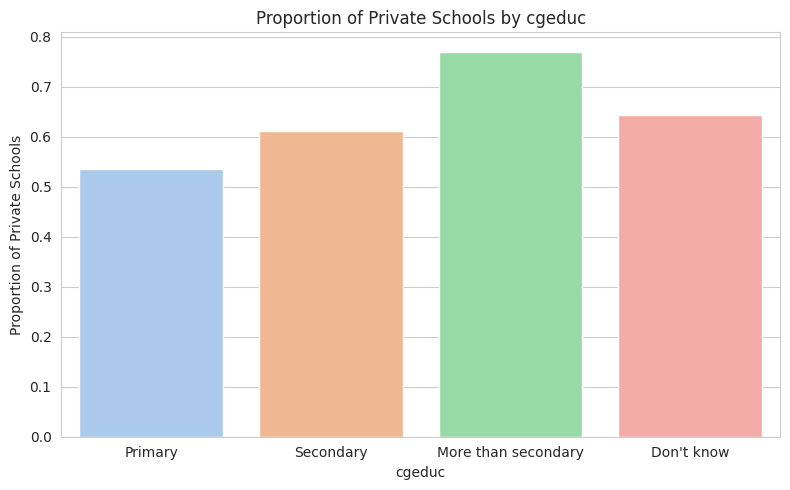

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt


meni['cgeduc'] = pd.Categorical(meni['cgeduc'],
                                categories=["Primary", "Secondary", "More than secondary", "Don't know"],
                                ordered=True)


prop_by_cgeduc = meni.groupby('cgeduc')['ownership'].apply(lambda x: (x == "Private").mean()).reset_index(name='prop_private')


plt.figure(figsize=(8, 5))
sns.barplot(x='cgeduc', y='prop_private', data=prop_by_cgeduc, palette="pastel")
plt.xlabel('cgeduc')
plt.ylabel('Proportion of Private Schools')
plt.title('Proportion of Private Schools by cgeduc')
plt.tight_layout()
plt.show()


# 4. Fitting a Regression Model & Reporting an Equation


For the overall sample, our analysis suggests that the reading comprehension score can be estimated by the equation:


rcomp=23.72+0.80×iqfull


This means that for every additional IQ point, the reading comprehension score increases by an average of about 0.80 points. The relationship is statistically significant (p < 0.001), and approximately 44.4% of the variation in reading comprehension scores is explained by IQ in the overall model.

For children in this benefit category, our analysis suggests that the reading comprehension score can be estimated by the equation:




rcomp=21.32+0.84×iqfull


This means that for every additional IQ point, the reading comprehension score increases by an average of 0.84 points. The relationship is statistically significant (p < 0.001), and about 40% of the variation in reading comprehension is explained by IQ.

For children in benefit group 2, our analysis suggests that the reading comprehension score can be estimated by the equation:



rcomp=40.46+0.59×iqfull


This means that for every additional IQ point, the reading comprehension score increases by an average of 0.59 points. The relationship between IQ and reading comprehension is statistically significant (p = 0.005), and about 17.6% of the variation in reading comprehension is explained by IQ in this group.

For children in benefit group 3, our analysis suggests that the reading comprehension score can be estimated by the equation:


rcomp=48.02+0.50×iqfull


This means that for every additional IQ point, the reading comprehension score increases by an average of about 0.50 points. The relationship between IQ and reading comprehension is statistically significant (p < 0.001), and approximately 58.4% of the variation in reading comprehension is explained by IQ in this group.

For children in benefit group 4, our analysis suggests that the reading comprehension score can be estimated by the equation:


rcomp=57.73+0.36×iqfull


This means that for every additional IQ point, the reading comprehension score increases by an average of about 0.36 points. However, the relationship between IQ and reading comprehension in this group is not statistically significant (p = 0.210), and the model explains roughly 29.2% of the variability in reading comprehension scores.

# <h1>MENISCUS data</h1>

# 0. Setup & Data Import


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, t
from scipy.stats import chi2_contingency

meni = pd.read_csv("meni.csv")

print(meni.head())
print(meni.info())


         id       dateI district uneb_strata ownership ageg  \
0  W52-162F  2022-05-13   Wakiso   High UNEB   Private   16   
1  W32-155F  2022-06-12   Wakiso   High UNEB   Private   15   
2  K17-109F  2022-04-01  Kalungu   High UNEB   Private   16   
3  K15-135F  2022-03-25  Kalungu   High UNEB   Private   15   
4  K06-274F  2022-06-05  Kalungu   High UNEB   Private   17   

                cgeduc  age_first dayschool                   religion  \
0            Secondary       15.0  Boarding  Protestant/Born Again/SDA   
1  More than secondary       13.0  Boarding                     Muslim   
2  More than secondary       13.0  Boarding  Protestant/Born Again/SDA   
3  More than secondary       12.0  Boarding  Protestant/Born Again/SDA   
4              Primary       15.0  Boarding  Protestant/Born Again/SDA   

       Muganda       hhsize  difficulty  knowledge painmgt  math_conf  \
0      Muganda   10+ people           7          3      No   1.666667   
1  Non_Muganda  6-10 people   

# 1) Binary Variable: Estimate a Proportion & 95% CI


### 1A. Identify the Binary Variable


In [ ]:
meni['ownership'].unique()

array(['Private', 'Government'], dtype=object)

In [ ]:
ownership_data = meni['ownership'].dropna()

ownership_binary = ownership_data.apply(lambda x: 1 if x == "Private" else 0)

n = len(ownership_binary)
p_hat = ownership_binary.mean()
print(n,p_hat)

1164 0.6391752577319587


In [ ]:
print(ownership_binary,ownership_data)

0       1
1       1
2       1
3       1
4       1
       ..
1159    0
1160    1
1161    1
1162    1
1163    1
Name: ownership, Length: 1164, dtype: int64 0          Private
1          Private
2          Private
3          Private
4          Private
           ...    
1159    Government
1160       Private
1161       Private
1162       Private
1163       Private
Name: ownership, Length: 1164, dtype: object


### 1B. 95% Confidence Interval (Normal Approximation)

In [ ]:
se = np.sqrt(p_hat * (1 - p_hat) / n)
z_95 = 1.96
ci_lower = p_hat - z_95 * se
ci_upper = p_hat + z_95 * se

print(f"Proportion of Private schools = {p_hat:.3f}")
print(f"95% CI: [{ci_lower:.3f}, {ci_upper:.3f}]")


Proportion of Private schools = 0.639
95% CI: [0.612, 0.667]


Based on our sample, approximately 63.9% of schools are private. We are 95% confident that the true proportion of private schools in the population lies between 61.2% and 66.7%.

# 2) Continuous Variable: Estimate Mean & 95% CI


In [ ]:
math_conf_data = meni['math_conf'].dropna()

mean_val = math_conf_data.mean()
sd_val = math_conf_data.std(ddof=1)
n_val = len(math_conf_data)

se_val = sd_val / np.sqrt(n_val)

alpha = 0.05
df = n_val - 1
from scipy.stats import t
t_crit = t.ppf(1 - alpha/2, df)

ci_lower_mean = mean_val - t_crit * se_val
ci_upper_mean = mean_val + t_crit * se_val

print(f"Mean of math_conf = {mean_val:.2f}")
print(f"95% CI: [{ci_lower_mean:.2f}, {ci_upper_mean:.2f}]")


Mean of math_conf = 1.69
95% CI: [1.65, 1.72]


The average math confidence score in our sample is approximately 1.69. We are 95% confident that the true mean math confidence score in the population lies between 1.65 and 1.72

# 3) Two Binary Variables: Table, Difference in Percentages, RR, OR, & CI

### 3A. Create a 2×2 Table


In [ ]:
meni['dayschool'].unique()

array(['Boarding', 'Day'], dtype=object)

In [ ]:
dayschool_binary = meni['dayschool'].dropna().apply(lambda x: 1 if x == "Boarding" else 0)

df_binary = meni.dropna(subset=['ownership', 'dayschool']).copy()

df_binary['ownership_bin'] = df_binary['ownership'].apply(lambda x: 1 if x == "Private" else 0)
df_binary['dayschool_bin'] = df_binary['dayschool'].apply(lambda x: 1 if x == "Boarding" else 0)

crosstab = pd.crosstab(df_binary['dayschool_bin'], df_binary['ownership_bin'])
crosstab.columns = ['Government','Private']
crosstab.index = ['Day','Boarding']
print("2x2 Table:\n", crosstab)


2x2 Table:
           Government  Private
Day              319      329
Boarding         101      415


### 3B. Difference in Proportions & 95% CI


In [ ]:
row_totals = crosstab.sum(axis=1)
p_day = crosstab.loc['Day','Private'] / row_totals['Day']
p_boarding = crosstab.loc['Boarding','Private'] / row_totals['Boarding']
diff_prop = p_boarding - p_day

n_day = row_totals['Day']
n_boarding = row_totals['Boarding']


se_diff = np.sqrt(p_day*(1-p_day)/n_day + p_boarding*(1-p_boarding)/n_boarding)
z_95 = 1.96
ci_lower_diff = diff_prop - z_95 * se_diff
ci_upper_diff = diff_prop + z_95 * se_diff

print(f"Difference in proportions (Boarding - Day) = {diff_prop:.3f}")
print(f"95% CI: [{ci_lower_diff:.3f}, {ci_upper_diff:.3f}]")


Difference in proportions (Boarding - Day) = 0.297
95% CI: [0.245, 0.348]


### 3C. Relative Risk & Odds Ratio

In [ ]:
c00 = crosstab.loc['Day','Government']
c01 = crosstab.loc['Day','Private']
c10 = crosstab.loc['Boarding','Government']
c11 = crosstab.loc['Boarding','Private']


rr = (c11 / (c11 + c10)) / (c01 / (c01 + c00))

or_ = (c11 * c00) / (c01 * c10)

print(f"Relative Risk = {rr:.3f}")
print(f"Odds Ratio    = {or_:.3f}")


Relative Risk = 1.584
Odds Ratio    = 3.984


The relative risk of 1.584 indicates that the likelihood of the event (e.g., attending a private school) is about 58.4% higher in one group compared to the other. Similarly, the odds ratio of 3.984 suggests that the odds of the event occurring in that group are nearly 4 times greater than in the reference group.

# 4) Figure: Binary Variable vs. Ordered Factor


### 4A. Convert cgeduc to an Ordered Categorical


In [ ]:
meni['cgeduc'].unique()

array(['Secondary', 'More than secondary', 'Primary', "Don't know",
       'None or less than primary'], dtype=object)

In [ ]:
cat_order = ["Primary", "Secondary", "More than secondary", "Don't know","None or less than primary"]
meni['cgeduc'] = pd.Categorical(meni['cgeduc'], categories=cat_order, ordered=True)

### 4B. Calculate Proportion of Private by cgeduc

In [ ]:
df_edu = meni.dropna(subset=['ownership','cgeduc']).copy()
df_edu['ownership_bin'] = df_edu['ownership'].apply(lambda x: 1 if x == "Private" else 0)

prop_by_edu = df_edu.groupby('cgeduc')['ownership_bin'].mean().reset_index()
prop_by_edu.columns = ['cgeduc','prop_private']
print(prop_by_edu)


                      cgeduc  prop_private
0                    Primary      0.536364
1                  Secondary      0.612195
2        More than secondary      0.770548
3                 Don't know      0.643564
4  None or less than primary      0.500000


<ipython-input-18-24fb64a03abb>:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_by_edu = df_edu.groupby('cgeduc')['ownership_bin'].mean().reset_index()


### 4C. Create a Bar Plot (or Dot Plot)

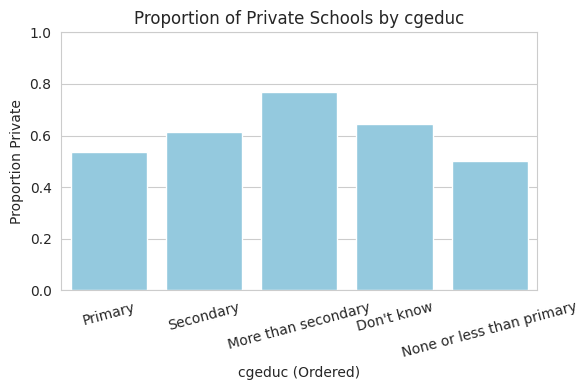

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(6,4))
sns.barplot(x='cgeduc', y='prop_private', data=prop_by_edu, color='skyblue')
plt.ylim(0,1)
plt.title("Proportion of Private Schools by cgeduc")
plt.xlabel("cgeduc (Ordered)")
plt.ylabel("Proportion Private")
plt.xticks(rotation=15)
plt.tight_layout()
plt.savefig("prop of private school by cgeduc.svg")
plt.show()


From this bar chart, we see that the proportion of private schools increases as we move from Primary to Secondary and then to More than secondary, reaching its highest point there. Although it decreases slightly for Don't Know, it still remains above the proportion observed for the lower education categories. Overall, this suggests a general trend of higher proportions of private schools in the more advanced education categories

<ipython-input-32-bc33d7d16f5d>:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  prop_by_edu = df_edu.groupby(['cgeduc', 'ownership_category']).size().reset_index(name='count')
<ipython-input-32-bc33d7d16f5d>:19: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  total_counts = df_edu.groupby('cgeduc').size().reset_index(name='total')


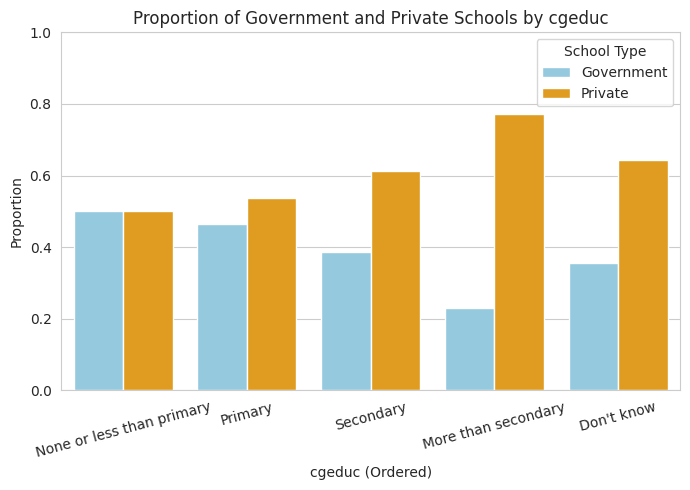

In [ ]:


cat_order = ["None or less than primary", "Primary", "Secondary", "More than secondary", "Don't know"]
meni['cgeduc'] = pd.Categorical(meni['cgeduc'], categories=cat_order, ordered=True)


df_edu = meni.dropna(subset=['ownership', 'cgeduc']).copy()


df_edu['ownership_category'] = df_edu['ownership'].apply(lambda x: "Private" if x == "Private" else "Government")


prop_by_edu = df_edu.groupby(['cgeduc', 'ownership_category']).size().reset_index(name='count')


total_counts = df_edu.groupby('cgeduc').size().reset_index(name='total')
prop_by_edu = prop_by_edu.merge(total_counts, on='cgeduc')
prop_by_edu['proportion'] = prop_by_edu['count'] / prop_by_edu['total']


sns.set_style("whitegrid")
plt.figure(figsize=(7,5))
sns.barplot(x='cgeduc', y='proportion', hue='ownership_category', data=prop_by_edu, palette=['skyblue', 'orange'])


plt.ylim(0,1)
plt.title("Proportion of Government and Private Schools by cgeduc")
plt.xlabel("cgeduc (Ordered)")
plt.ylabel("Proportion")
plt.xticks(rotation=15)
plt.legend(title="School Type")
plt.tight_layout()


plt.savefig("prop_of_private_and_gov_by_cgeduc.svg", format="svg")
plt.show()
